# Spambase Dataset: Spam or Not Spam E-mails Using Classifications ?
Hans Darmawan - JCDS2602

# 1. Business Understanding

Electronic mail (email) is defined as a method of electronic messaging that can occur via direct computer links, local area networks, or wide area networks, typically involving messages sent between specific electronic mailboxes. Email messages are composed, transmitted, and received through a system of mail servers and clients following established protocols such as SMTP and POP3. Unique email addresses are assigned using Internet conventions to ensure proper routing and delivery of messages. Headers are added and modified by various mail servers during the transmission process to track the message’s journey and provide metadata. Email software features and security considerations have been outlined, emphasizing the speed, convenience, and necessary precautions when handling electronic mail (Sennewald & Baillie, 2016).

Email spam, also known as junk email, is defined as unsolicited messages sent in bulk, often by botnets controlled by attackers (Kirvan, Awati, & Teravainen, 2024). It is estimated that about half of the 350 billion daily emails in 2023 were spam, causing significant costs and risks to businesses and individuals. Various techniques such as botnets, snowshoe spam, and image spam are employed to distribute these messages. Spam emails often contain commercial content with financial motives or malicious links designed to steal information or spread malware. Efforts to combat spam include legal regulations, advanced filtering technologies, and user education to identify and report suspicious emails.

Email spamming significantly impacts both users and organizations by causing wasted time, increased bandwidth usage, and potential security risks such as phishing attacks and malware distribution (Almeida, Almeida & Yamakami, 2011). According to Metsis et al. (2006) and Google Developers (2025), a confusion matrix helps evaluate the performance of a spam filter by categorizing outcomes into four types In the context of spam detection, which are:
- A true positive (TP) occurs when a spam email is correctly identified as spam.
- A true negative (TN) is when a legitimate email is correctly classified as not spam. 
- A false positive (FP) happens when a legitimate email is incorrectly marked as spam, causing important messages to be missed. 
- A false negative (FN) is when a spam email is mistakenly classified as legitimate, allowing unwanted content to reach the user’s inbox. 

In the context of email spam filtering, false negatives (FNs) are generally more dangerous than false positives (FPs) because false negatives allow harmful spam—such as phishing or malware emails—to reach the user's inbox, potentially causing significant financial losses, data breaches, and security compromises (Guzella & Caminhas, 2009). False positives, while inconvenient because legitimate emails are wrongly classified as spam, usually result in missed or delayed communication rather than direct harm. Financially, the cost of a false negative can be modeled as the expected loss from a successful attack or fraud, and the cost of a false positive is the operational cost of recovering missed legitimate messages. For example, if the average financial loss per false negative is 5,000 USD and the cost per false positive is 100 USD, then the total expected loss is calculated as:

     (number of false negatives × 5,000) + (number of false positives × 100). 

Therefore, reducing false negatives is critical to minimizing overall risk and financial damage caused by spam emails.

# 2. Data Understanding

The Spambase dataset, created in 1999 and last updated in 2023, is used for classifying emails as spam or non-spam. It contains 4,601 instances with 57 features, including word and character frequencies and statistics on capital letter sequences. The dataset aims to help build filters that accurately distinguish spam, minimizing false positives, which are particularly undesirable. Typical classification error rates are around 7%. The dataset was developed by Hopkins, Reeber, Forman, and Suermondt and is publicly available through the UCI Machine Learning Repository (Hopkins et al., 1999).

In [38]:
import pandas as pd

real_df = pd.read_csv('spambase.csv')
df = real_df.copy()
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Spambase Dataset Summary (DataFrame Info)

- **Number of instances (rows):** 4601  
- **Number of columns (features + target):** 58  

### Columns and Data Types
- 55 columns are of type `float64` representing continuous numerical features.
- 3 columns are of type `int64`, including:
  - `capital_run_length_longest`
  - `capital_run_length_total`
  - `Class` (target variable)

### Class Label Description

- **Class 0:** Non-spam email (legitimate email)
- **Class 1:** Spam email (unsolicited commercial email)


### Feature Description
- Columns 0 to 47 (`word_freq_*` and `char_freq_*`) represent the frequency of specific words or characters in an email, expressed as percentages (float values).
- Columns 48 to 53 (`char_freq_;`, `char_freq_(`, etc.) are character frequency features.
- Columns 54 to 56 represent statistics related to sequences of capital letters:
  - `capital_run_length_average` (float): average length of uninterrupted capital letter sequences.
  - `capital_run_length_longest` (int): length of the longest uninterrupted capital letter sequence.
  - `capital_run_length_total` (int): total number of capital letters in the email.
- Column 57 (`Class`) is the target variable indicating whether an email is spam (1) or not (0).

## Missing Values Checking

In [39]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Confirmed that there are no missing values in this dataset, which means all columns have 4601 non-null entries.

## Duplicates Checking

In [40]:
df.duplicated().sum()

391

This dataset contains 391 duplicate entries. These duplicates represent repeated rows that are identical across all features and the target. It may be beneficial to remove or handle these duplicates before training models to avoid bias or overfitting, but it will be considered later.

## Proportion Analysis

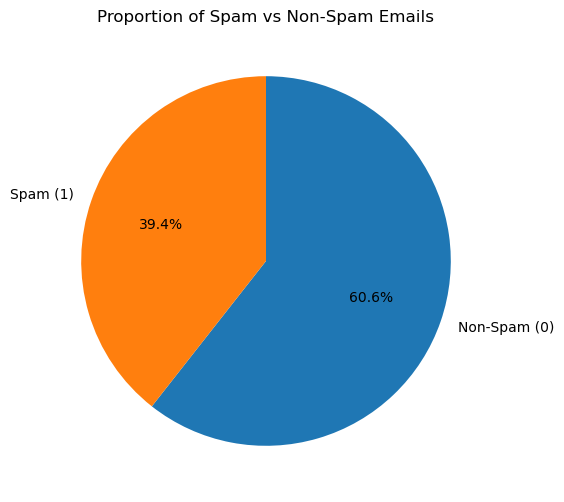

In [41]:
import matplotlib.pyplot as plt

# Calculate class proportions
class_counts = df['Class'].value_counts()
class_labels = ['Non-Spam (0)', 'Spam (1)']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proportion of Spam vs Non-Spam Emails')
plt.show()

The dataset has approximately 60.6% non-spam emails (majority class) and 39.4% spam emails (minority class). This distribution is relatively **close to balanced**. A dataset is often considered imbalanced when one class significantly outnumbers the other, commonly when the minority class represents less than 20-30% of the data (He & Garcia, 2009; Johnson & Khoshgoftaar, 2019). Without removing the duplicates, such a distribution allows standard classification algorithms to perform well without requiring extensive imbalance-handling techniques.

## Frequency Analysis

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Generate list of word frequency columns using list comprehension
word_freq_cols = [col for col in df.columns if col.startswith('word_freq_')]

def create_wordcloud(data, title):
    # Convert word frequencies to a dictionary suitable for WordCloud
    word_freq_dict = {col.replace('word_freq_', ''): data[col].mean() for col in word_freq_cols}
    
    # Generate wordcloud
    wc = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)
    
    # Plot
    plt.figure(figsize=(14, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

def plot_word_freq_distribution(data, title):
    # Calculate mean frequencies for each word feature
    mean_freq = data[word_freq_cols].mean().sort_values(ascending=False)
    
    # Plot distribution as barplot without palette to avoid warning
    plt.figure(figsize=(14, 6))
    sns.barplot(x=mean_freq.index.str.replace('word_freq_', ''), y=mean_freq.values)
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Average Frequency (%)')
    plt.title(title)
    plt.tight_layout()
    plt.show()


This code analyzes word frequencies in email data by first identifying all columns related to word counts. It then creates two types of visualizations: a word cloud and a bar chart. The word cloud displays words sized according to their average frequency in a selected group of emails (e.g., spam or non-spam), making it easy to see which words are most common. The bar chart presents the same information as sorted bars, allowing precise comparison of average word frequencies across the dataset. Together, these visualizations help highlight key words that differentiate spam from non-spam emails.

Using the average (mean) to analyze word and character frequencies in email classification tasks provides a clear and effective measure of central tendency, especially in large datasets like Spambase. The mean captures the typical frequency of features across instances, facilitating straightforward comparison between classes such as spam and non-spam. While alternatives like the median or mode are useful in skewed or heavily zero-inflated data, they often yield less informative results in this context, as many word frequencies tend to be zero. Thus, the mean offers a more stable and interpretable summary for distinguishing feature importance during exploratory data analysis and visualization (Kuhn & Johnson, 2019; James et al., 2013).

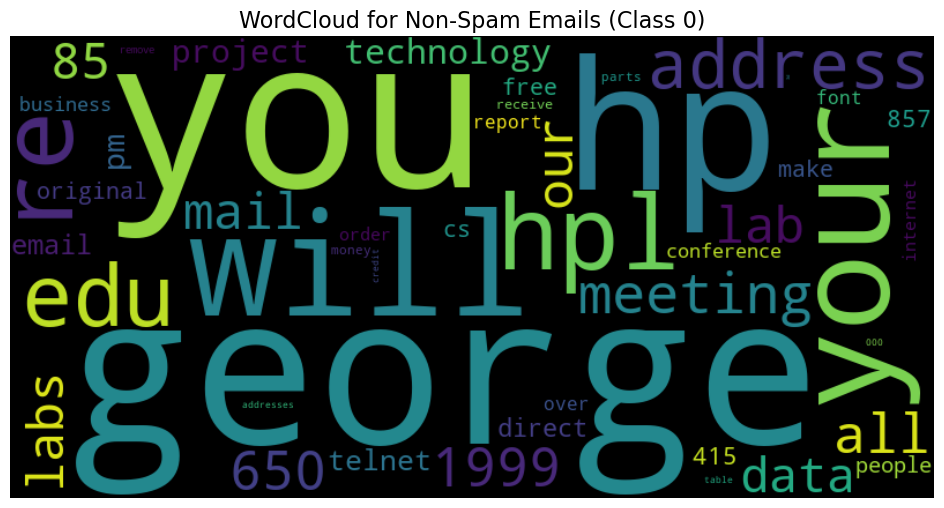

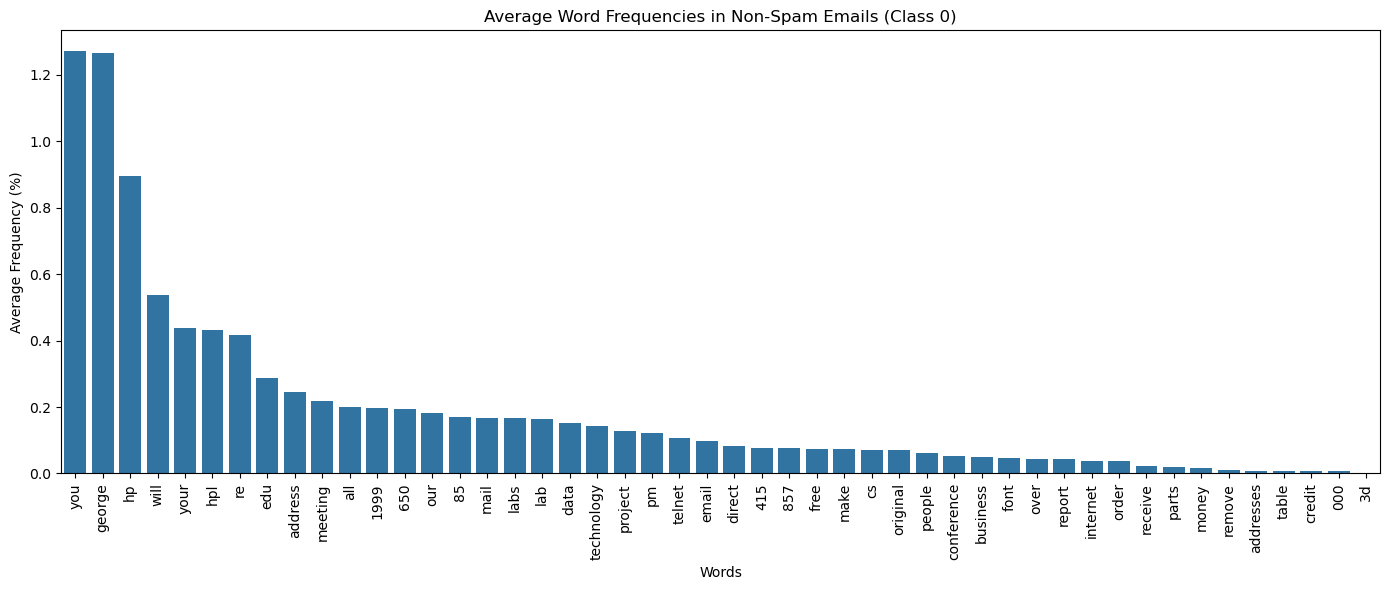

In [43]:
# Create wordcloud for Non-Spam emails (Class 0)
create_wordcloud(df[df['Class'] == 0], "WordCloud for Non-Spam Emails (Class 0)")

# Plot distribution for Non-Spam emails (Class 0)
plot_word_freq_distribution(df[df['Class'] == 0], "Average Word Frequencies in Non-Spam Emails (Class 0)")

The word cloud highlights the most frequently occurring words in non-spam emails by displaying them in sizes proportional to their average frequency. Prominent words such as "you," "george," "hp," "will," and "your" suggest common, personalized, or context-specific terms typical in legitimate communications. For example, "george" and "650" are known indicators of non-spam emails in this dataset, possibly related to specific senders or local identifiers.

The bar chart quantifies these observations by showing the average frequency percentages of the top words. Words like "you" and "george" appear with the highest average frequency (~1.2%), followed by others such as "hp," "will," and "your" with slightly lower but still significant frequencies. This detailed frequency distribution confirms that non-spam emails tend to use more personalized and context-related vocabulary, reflecting typical conversational or business-related content.

Together, these visualizations suggest that non-spam emails are characterized by words indicating personal communication, organizational references, and specific identifiers, which can help distinguish them from spam emails during classification.

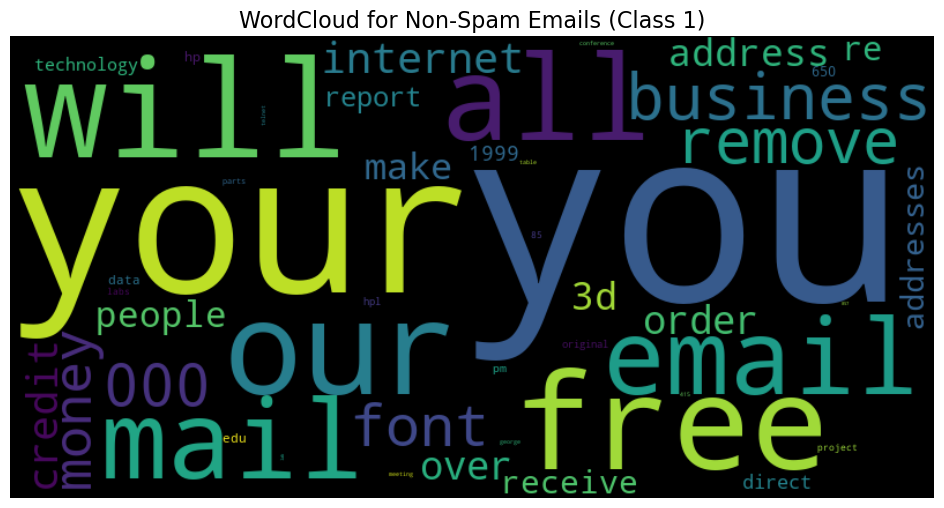

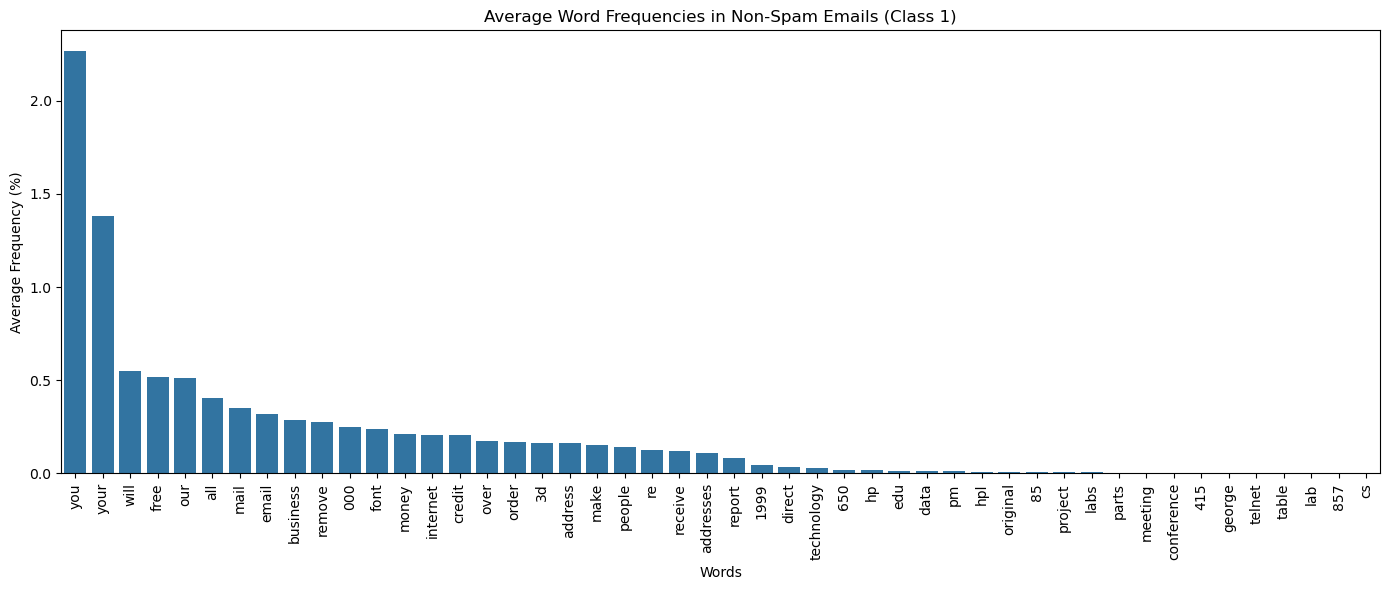

In [44]:
# Create wordcloud for Non-Spam emails (Class 1)
create_wordcloud(df[df['Class'] == 1], "WordCloud for Non-Spam Emails (Class 1)")

# Plot distribution for Non-Spam emails (Class 1)
plot_word_freq_distribution(df[df['Class'] == 1], "Average Word Frequencies in Non-Spam Emails (Class 1)")

The word cloud for spam emails highlights frequently occurring words that are typical in unsolicited commercial messages. Prominent words such as "you," "your," "free," "business," "remove," "credit," "money," and "order" reflect common themes in spam, including promotions, offers, and calls to action. Words like "email," "addresses," and "internet" also suggest the digital nature of these messages. The presence of words like "000" and "font" may relate to formatting tricks often used in spam.

The bar chart quantifies these findings by showing the average frequency of these words in spam emails. Words like "you" and "your" appear most frequently (over 2% and about 1.4%, respectively), followed by "will," "free," and "our." This distribution supports the idea that spam emails often use persuasive language focused on the recipient and promotional content.

Together, these visualizations illustrate that spam emails tend to use words related to marketing, urgency, and financial incentives, which helps differentiate them from non-spam emails during classification.

In [45]:
# List of character frequency columns
char_freq_cols = [col for col in df.columns if col.startswith('char_freq_')]

def plot_char_freq_distribution(data, title):
    # Calculate mean frequencies for each character feature
    mean_freq = data[char_freq_cols].mean().sort_values(ascending=False)
    
    # Plot distribution as barplot without palette to avoid warning
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_freq.index.str.replace('char_freq_', ''), y=mean_freq.values)
    plt.xticks(rotation=0)
    plt.xlabel('Characters')
    plt.ylabel('Average Frequency (%)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

This code focuses on analyzing character frequencies in email data by first selecting all columns related to character counts. It calculates the average frequency of each character feature within a chosen subset of emails (such as spam or non-spam) and visualizes these averages using a bar chart. The chart displays characters on the x-axis and their mean frequencies on the y-axis, allowing clear comparison of how often different characters appear across email classes. This approach helps identify distinctive character usage patterns that may differentiate spam from non-spam emails. Using the average frequency as a measure provides a reliable and interpretable summary of typical character occurrence, which is especially useful in large datasets like Spambase. While other statistics like the median can be informative in skewed data, the mean generally offers a clearer comparison for exploratory analysis and visualization purposes (Kuhn & Johnson, 2019; James et al., 2013).

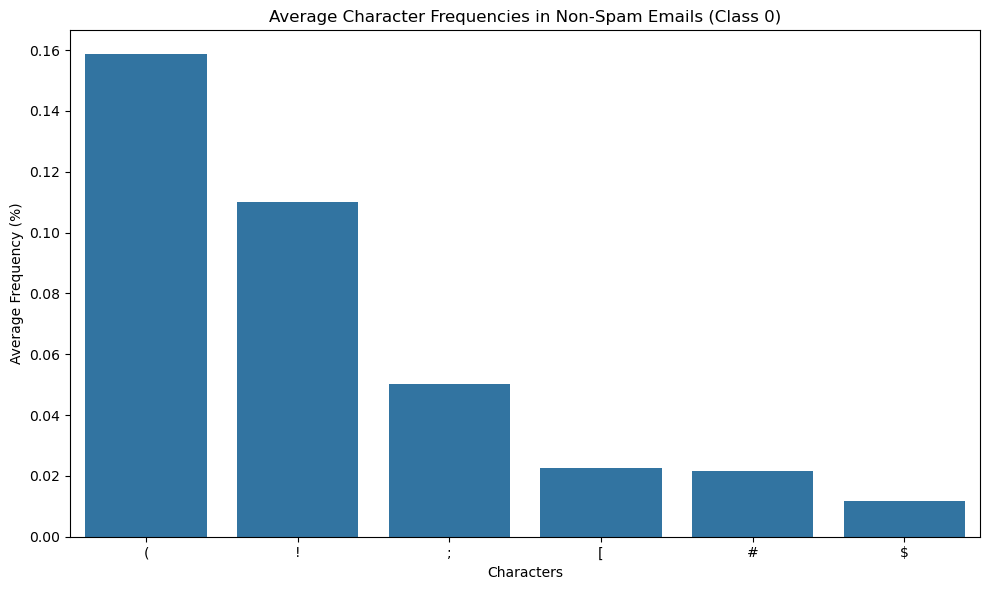

In [46]:
# Plot distribution for Non-Spam emails (Class 0)
plot_char_freq_distribution(df[df['Class'] == 0], "Average Character Frequencies in Non-Spam Emails (Class 0)")

The bar chart shows that non-spam emails most frequently contain the character `(` followed by `!` and `;`. These characters are commonly used in normal text for parentheses, exclamations, and semicolons, reflecting typical sentence structures or formatting in legitimate emails. Characters like `[` and `#` appear less frequently but still contribute to the overall text style. The relatively balanced distribution of these characters suggests standard punctuation usage in non-spam emails.

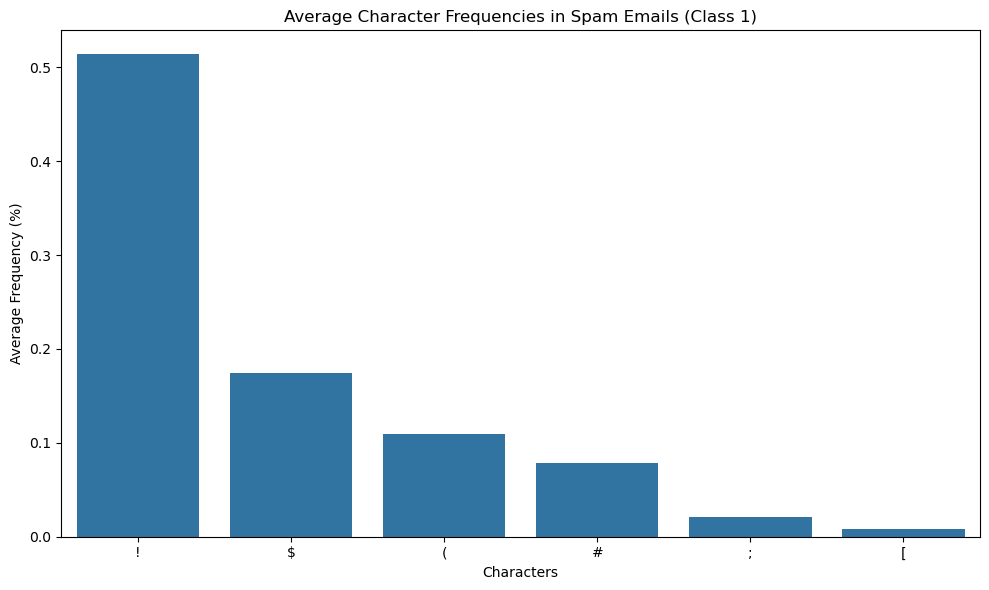

In [47]:
# Plot distribution for Spam emails (Class 1)
plot_char_freq_distribution(df[df['Class'] == 1], "Average Character Frequencies in Spam Emails (Class 1)")

In spam emails, the character `!` is by far the most frequent, followed by `$` and `(`. This pattern aligns with the persuasive and attention-grabbing nature of spam messages, where exclamation marks are used to create urgency or excitement, and dollar signs are common in financial or promotional content. The character `#` appears moderately, while `;` and `[` are less frequent. The higher frequency of `!` and `$` highlights typical spam tactics aimed at enticing recipients.

## Normality Analysis

In [48]:
df2 = df.copy()

# Sum all word frequency columns into a new column 'word_freqs'
def group_word_freq(df2):
    df2['word_freqs'] = df2[[col for col in df2.columns if col.startswith('word_freq_')]].sum(axis=1)

group_word_freq(df2)

# Sum all character frequency columns into a new column 'char_freqs'
def group_char_freq(df2):
    df2['char_freqs'] = df2[[col for col in df2.columns if col.startswith('char_freq_')]].sum(axis=1)

group_char_freq(df2)

# List of columns to plot (excluding 'Class' if you want)
columns_to_plot = ['word_freqs', 'char_freqs', 
                   'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
df2 = df2[columns_to_plot + ['Class']]
df2.head()

,word_freqs,char_freqs,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,6.74,0.778,3.756,61,278,1
1,11.11,0.732,5.114,101,1028,1
2,10.95,0.623,9.821,485,2259,1
3,7.24,0.274,3.537,40,191,1
4,7.24,0.270,3.537,40,191,1


The code creates a copy of the original dataset and adds two new columns: wordfreqs and charfreqs. These columns represent the total frequency of all word-related and character-related features, respectively, by summing the values of all columns that start with "wordfreq" and "charfreq" for each email. This aggregation simplifies the dataset by consolidating multiple related features into summary metrics, which can be useful for this EDA.

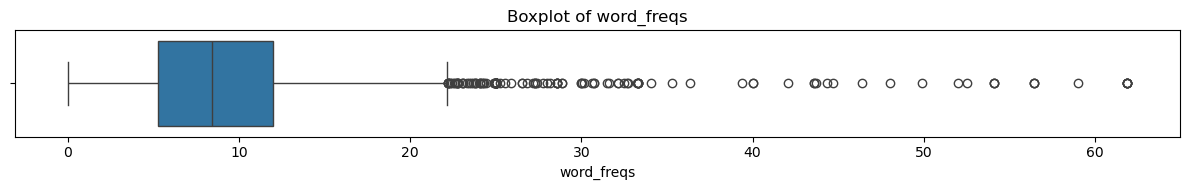

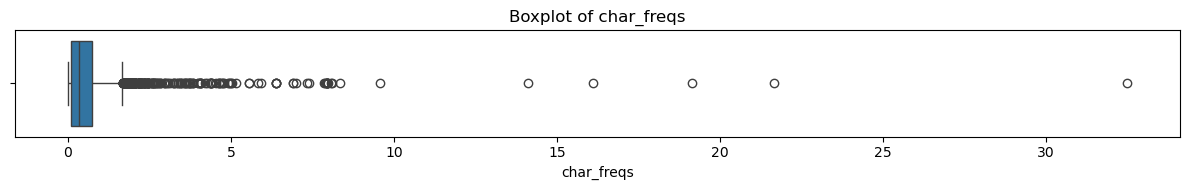

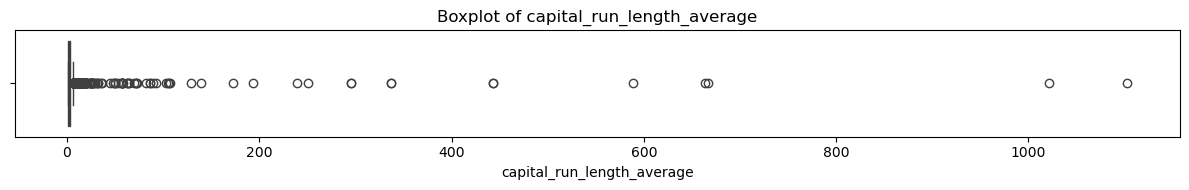

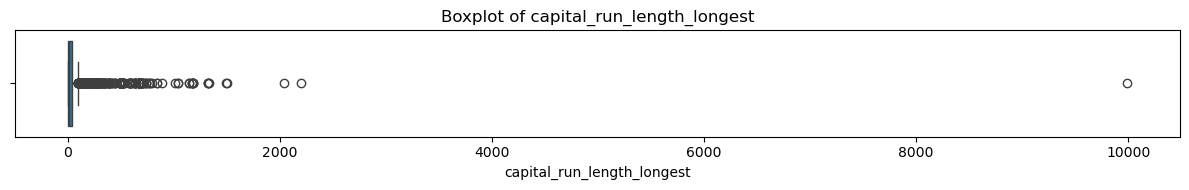

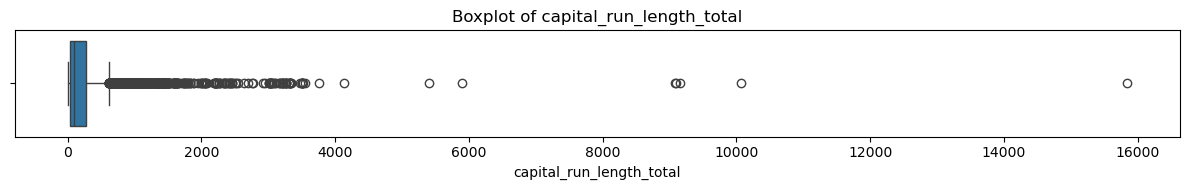

In [49]:
# Create boxplots for each column in a loop
for col in columns_to_plot:
    plt.figure(figsize=(12, 2))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


The boxplots for the features wordfreqs, charfreqs, and the three capital run length metrics reveal significant skewness and the presence of numerous outliers. Most values cluster near the lower end of the scale, indicating that for the majority of emails, word and character frequencies, as well as capital letter sequences, are relatively low. However, the long tails and outliers—especially pronounced in the capital run length features—suggest that some emails contain exceptionally high values, likely corresponding to spam messages that use excessive capitalization and unusual character patterns. This distributional pattern highlights the importance of these features in distinguishing spam from non-spam emails and suggests that appropriate data preprocessing or robust modeling techniques may be necessary to handle such variability and outliers effectively.

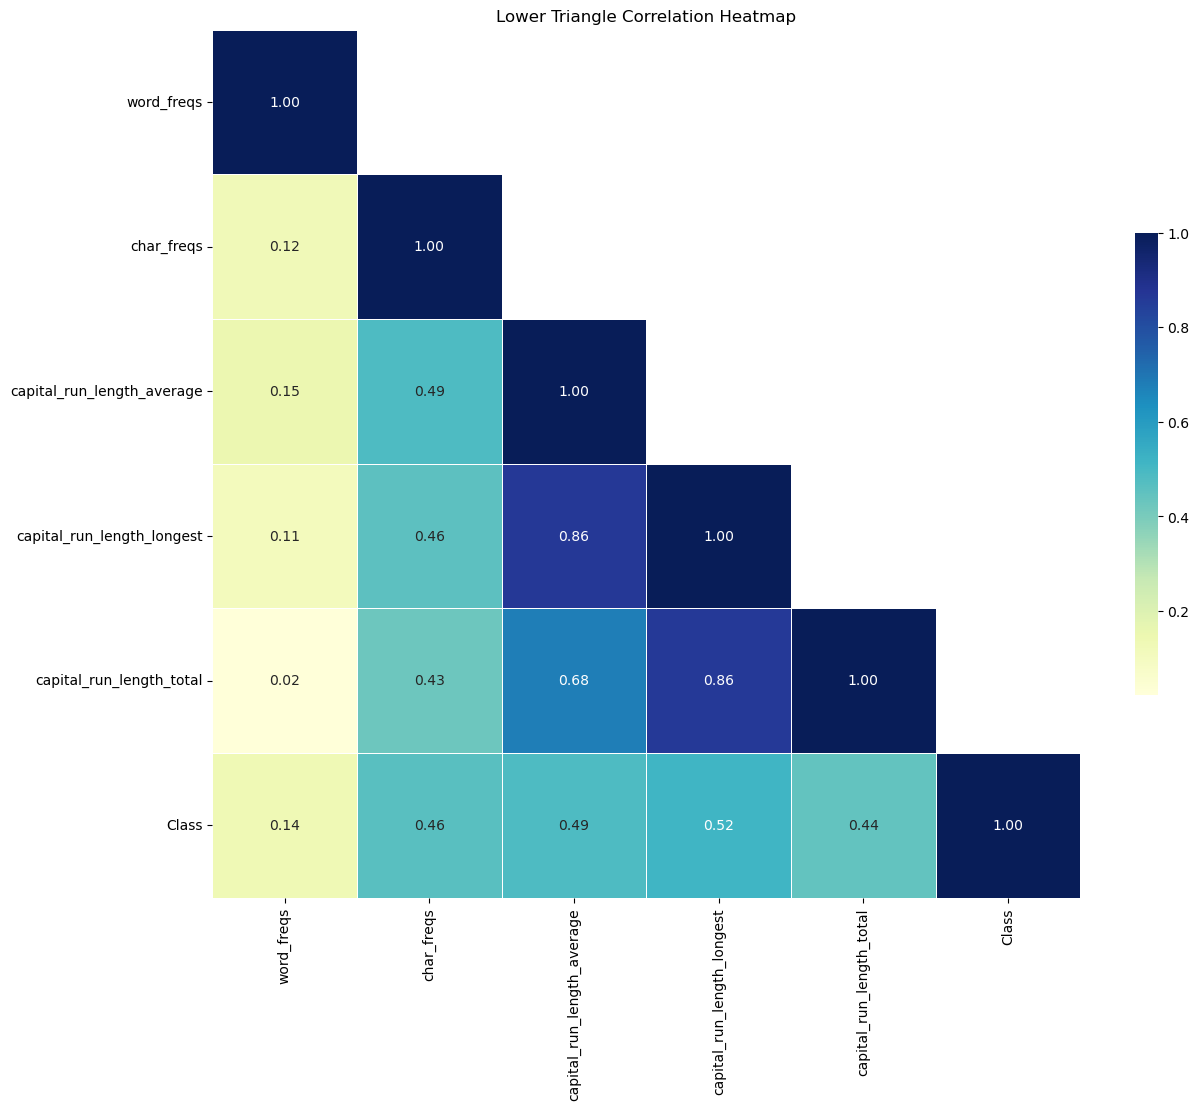

In [50]:
import numpy as np

# Calculate correlation matrix (numeric columns only)
corr_matrix = df2.corr(numeric_only=True, method='spearman')

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=~mask, annot=True, fmt=".2f", cmap='YlGnBu',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Lower Triangle Correlation Heatmap')
plt.show()


The Spearman correlation heatmap reveals meaningful relationships among the features in the dataset. Notably, the capital run length features show strong positive correlations with each other (ranging from 0.43 to 0.86), reflecting their related measurement of consecutive capital letters in emails. The moderate positive correlations between these capital run length features and the target class (0.44 to 0.52) suggest that emails with longer sequences of capital letters are more likely to be spam. Character frequencies also exhibit a moderate positive correlation with the class (0.46), while total word frequencies have a weaker association (0.14). Spearman’s rank correlation coefficient, a nonparametric measure of monotonic association, is appropriate here due to its robustness to non-normality and outliers common in text data (Hauke & Kossowski, 2011). These findings indicate that features related to capitalization and character usage are more predictive of spam than overall word frequency, aligning with domain knowledge that spam often employs excessive capitalization and special characters to attract attention.

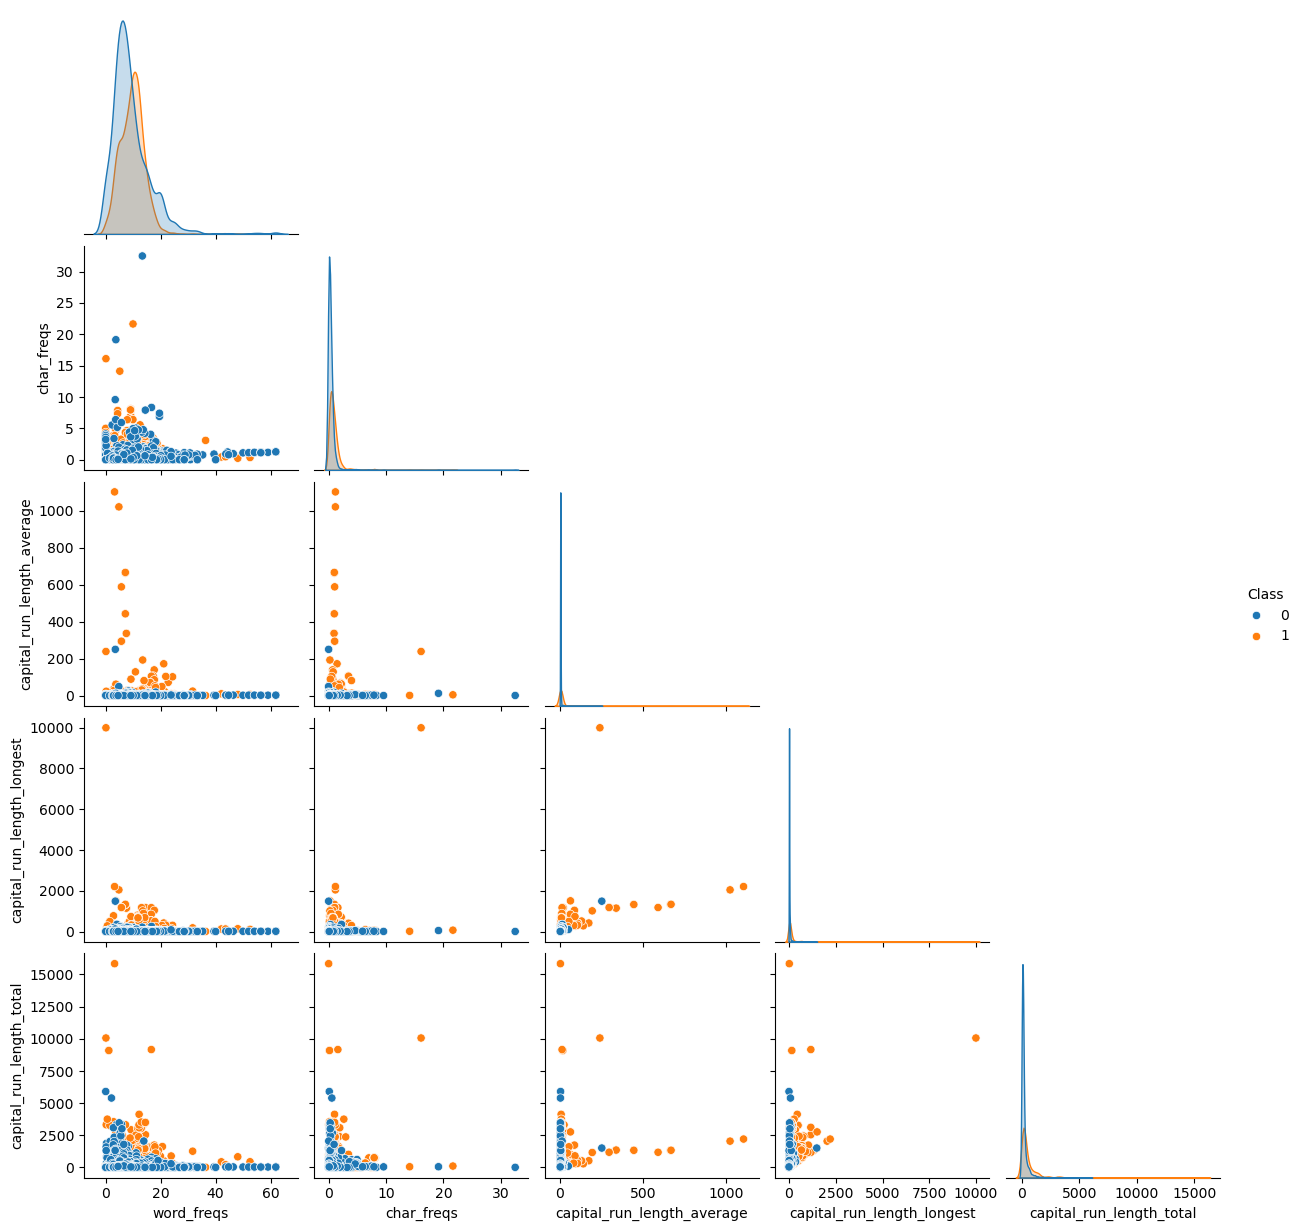

In [51]:
sns.pairplot(df2, hue='Class', corner=True, diag_kind='kde');

The pairplot visualization displays the relationships and distributions of key features in the dataset, separated by email class (non-spam = 0, spam = 1). The diagonal plots show the distribution of each feature, revealing that most features are heavily right-skewed with many low values and a few extreme outliers. The scatterplots below the diagonal illustrate how these features relate to each other and differ between classes. Notably, spam emails (orange points) tend to have higher values in capital letter run length features (capitalrunlengthaverage, capitalrunlengthlongest, capitalrunlengthtotal) and character frequencies (charfreqs) compared to non-spam emails (blue points). This pattern supports the idea that spam messages often use excessive capitalization and special characters to attract attention. Word frequencies (word_freqs) show less clear separation, indicating they may be less discriminative on their own.

# 3. Data Preparation

## Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

# Perform train-test split with default parameters and stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y  # preserve class distribution
)

Train-test split is a common method in machine learning that divides a dataset into two parts: one for training the model and one for testing its performance. This separation helps evaluate how well the model can predict new, unseen data, preventing overly optimistic results caused by testing on the same data used for training. The most commonly used test size is 0.2 or 20%, meaning that 20% of the dataset is reserved for testing while 80% is used for training. This split provides a good balance between having enough data to train the model effectively and enough data to reliably evaluate its performance on unseen samples. In some cases, 25% or 30% test size is also used, especially when the dataset is large enough to still have sufficient training data. The choice depends on the total sample size and the need for robust evaluation, but 20% remains a widely accepted default in machine learning practice (James et al., 2013).

Setting a random state (seed) ensures reproducibility of the train-test split, so that the same split can be generated consistently across different runs. While the default is often None, meaning the split is random and changes each time, using a fixed integer value (e.g., 42) is a common practice to allow others to replicate results exactly. This reproducibility is critical in scientific research and model development for verification and comparison purposes. Thus, many practitioners set a specific random state to ensure consistent experimental conditions (Kuhn & Johnson, 2019).

Stratification is widely used in classification problems to maintain the original class distribution in both training and testing sets. This is especially important when the dataset is imbalanced or when the minority class is small, as it prevents biased or unrepresentative splits that can degrade model performance or evaluation validity. Using the stratify parameter with the target variable ensures that each subset reflects the same proportion of classes as the full dataset, improving generalization and fairness in model assessment (He & Garcia, 2009; Johnson & Khoshgoftaar, 2019).

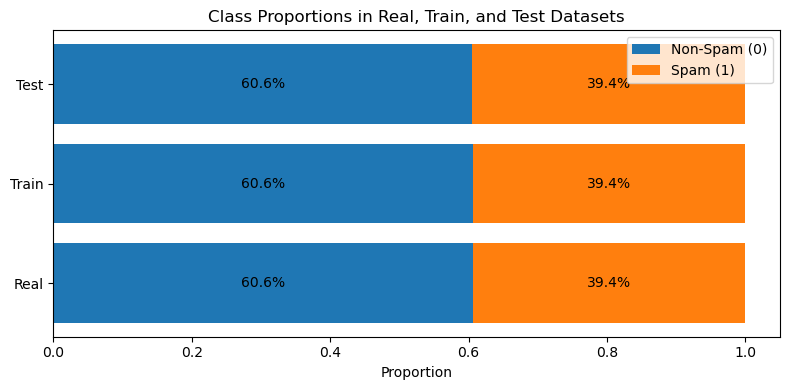

In [53]:
# Calculate class proportions for real, train, and test datasets
def get_class_proportions(labels):
    counts = labels.value_counts(normalize=True).sort_index()
    return counts.values

real_props = get_class_proportions(y)
train_props = get_class_proportions(y_train)
test_props = get_class_proportions(y_test)

# Labels and data - sorted as requested
datasets = ['Real', 'Train', 'Test']  # Sorted order
class_labels = ['Non-Spam (0)', 'Spam (1)']

# Data for stacked bar chart, matching the sorted order
non_spam = [real_props[0], train_props[0], test_props[0]]
spam = [real_props[1], train_props[1], test_props[1]]

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(datasets, non_spam, label='Non-Spam (0)')
ax.barh(datasets, spam, left=non_spam, label='Spam (1)')

# Add percentages inside bars
for i in range(len(datasets)):
    ax.text(non_spam[i]/2, i, f"{non_spam[i]*100:.1f}%", va='center', ha='center', color='black', fontsize=10)
    ax.text(non_spam[i] + spam[i]/2, i, f"{spam[i]*100:.1f}%", va='center', ha='center', color='black', fontsize=10)

ax.set_xlabel('Proportion')
ax.set_title('Class Proportions in Real, Train, and Test Datasets')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


The stacked bar chart shows the class proportions of Non-Spam (0) and Spam (1) emails in the real dataset, training set, and test set. All three datasets have identical class distributions, with approximately 60.6% of emails classified as Non-Spam and 39.4% as Spam. This indicates that the train-test split was performed with stratification, preserving the original class balance across both training and testing subsets. Maintaining consistent class proportions is crucial to ensure that the model is trained and evaluated on representative samples, which helps prevent bias and improves the reliability of performance metrics. Overall, this result confirms that the data splitting process was done correctly and supports robust model development and evaluation.

# 4. Data Modeling

## Cross Validation

According to Belcic (2024), classification in machine learning is a predictive modeling process where algorithms predict the correct label for input data. Models learn from training data, understanding relationships between features and class labels, and are then tested on unseen data to evaluate performance. Classifies data points into predefined groups or classes based on learned characteristics from input data. Classification algorithms categorize data into different classes. Common algorithms include:
- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)
- Naive Bayes
- XGBoost

In [54]:
# Import necessary libraries
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.model_selection import cross_val_score  # Import cross_val_score
import xgboost as xgb  # Import XGBoost

# Set the number of CPU cores to use for joblib
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adjust this number as needed

# Create pipelines for each model and store them in a dictionary
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=2000, random_state=42))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree Classifier': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(random_state=42))
    ]),
    'Naive Bayes': Pipeline([
        ('classifier', GaussianNB())
    ]),
    'Random Forest Classifier': Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('classifier', xgb.XGBClassifier(eval_metric='mlogloss', random_state=42))  # Removed use_label_encoder
    ])
}

# Check feature names
# print(X_train.columns)

# Clean feature names by replacing special characters with descriptive text
X_train.columns = [
    str(col)
    .replace('[', 'opening_bracket')
    .replace(']', 'closing_bracket')
    .replace('<', 'open_angled_bracket')
    .replace('>', 'close_angled_bracket')
    for col in X_train.columns
]

# Initialize a list to store cross-validation results
cross_val_results = []

# Evaluate the models using cross-validation
for model_name, pipeline in pipelines.items():
    try:
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
        mean_score = round(scores.mean(), 3)  # Round mean score to 3 decimal places
        std_score = round(scores.std(), 3)    # Round standard deviation to 3 decimal places

        # Append the results to the list
        cross_val_results.append({
            'Model Name': model_name,
            'All Scores': [round(score, 3) for score in scores.tolist()],  # Store all scores as a list rounded to 3 decimals
            'Mean Accuracy': mean_score,
            'Standard Deviation': std_score
        })
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Create a DataFrame from the cross-validation results
cross_val_df = pd.DataFrame(cross_val_results)

# Display the DataFrame sorted by Mean Accuracy
sorted_cross_val_df = cross_val_df.sort_values(by='Mean Accuracy', ascending=False)
sorted_cross_val_df


,Model Name,All Scores,Mean Accuracy,Standard Deviation
6,XGBoost,"[0.964, 0.945, 0.942, 0.965, 0.961]",0.955,0.010
5,Random Forest Classifier,"[0.958, 0.949, 0.93, 0.957, 0.957]",0.950,0.010
3,Support Vector Machine,"[0.933, 0.933, 0.91, 0.942, 0.916]",0.927,0.012
0,Logistic Regression,"[0.928, 0.92, 0.906, 0.942, 0.922]",0.923,0.012
2,Decision Tree Classifier,"[0.922, 0.907, 0.89, 0.894, 0.912]",0.905,0.012
1,K-Nearest Neighbors,"[0.91, 0.906, 0.893, 0.903, 0.901]",0.903,0.006
4,Naive Bayes,"[0.82, 0.804, 0.833, 0.832, 0.836]",0.825,0.012


# 5. Evaluation

According to Belicic (2024), common metrics include:
- **Accuracy**: Ratio of correct predictions to total predictions.
- **Precision**: Proportion of true positive predictions among all positive predictions.
- **Recall**: Proportion of actual positives correctly identified.
- **F1 Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Visual representation of true vs. predicted values.
- **ROC Curve**: Graphical representation of true positive rate against false positive rate.

# 6. Deployment

# References

Almeida, T. A., Almeida, J. M., & Yamakami, A. (2011). Spam filtering: How the dimensionality reduction affects the accuracy of classifiers. *Information Sciences*, 181(6), 1138-1152. https://jisajournal.springeropen.com/articles/10.1007/s13174-010-0014-7

Belcic, I. (2024, October 15). *What is classification in machine learning?* IBM Think. https://www.ibm.com/think/topics/classification-machine-learning

Google Developers. (2025). Thresholds and the confusion matrix. Machine Learning Crash Course. https://developers.google.com/machine-learning/crash-course/classification/thresholding

Guzella, T. S., & Caminhas, W. M. (2009). A review of machine learning approaches to spam filtering. Expert Systems with Applications, 36(7), 10206-10222. https://www.sciencedirect.com/science/article/abs/pii/S095741740900181X

Hauke, J., & Kossowski, T. (2011). Comparison of values of Pearson’s and Spearman’s correlation coefficients on the same sets of data. *Quaestiones Geographicae*, 30(2), 87-93. https://doi.org/10.2478/v10117-011-0021-1

He, H., & Garcia, E. A. (2009). Learning from imbalanced data.* IEEE Transactions on Knowledge and Data Engineering*, 21(9), 1263-1284. https://doi.org/10.1109/TKDE.2008.239

Hopkins, M., Reeber, E., Forman, G., & Suermondt, J. (1999). Spambase dataset. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/94/spambase

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: with Applications in R (1st ed.)*. Springer. https://doi.org/10.1007/978-1-4614-7138-7

Johnson, J. M., & Khoshgoftaar, T. M. (2019). Survey on deep learning with class imbalance. *Journal of Big Data*, 6(1), 27. https://doi.org/10.1186/s40537-019-0192-5

Kirvan, P., Awati, R., & Teravainen, T. (2024). What is email spam and how to fight it? TechTarget. https://www.techtarget.com/searchsecurity/definition/spam

Kuhn, M., & Johnson, K. (2019). *Feature Engineering and Selection: A Practical Approach for Predictive Models*. CRC Press.

Metsis, V., Androutsopoulos, I., & Paliouras, G. (2006). Spam filtering with naive Bayes-which naive Bayes? *CEAS 2006 - Third Conference on Email and Anti-Spam.*

Sennewald, C. A., & Baillie, C. (2016). Computers and effective security management. *Effective security management* (6th ed., pp. 235–249). Elsevier.